# Assignment 3
## 1. Designing CFGs for NLP
### 1.1: Extend a CFG to support Number agreement, Pronouns and Dative Constructions

Import the needed libraries

In [1]:
import numpy as np
import nltk
from nltk.grammar import toy_pcfg2
from nltk import Tree
from nltk.treetransforms import chomsky_normal_form
from nltk.corpus import LazyCorpusLoader, BracketParseCorpusReader
from nltk import Nonterminal
from nltk.grammar import Production
from copy import deepcopy
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.probability import *
import math
from nltk.parse import ViterbiParser

In [2]:
sg = """
S -> NP VP
VP -> IV | TV NP
NP -> 'John' | "bread"
IV -> 'left'
TV -> 'eats'
"""
g = nltk.CFG.fromstring(sg)

# Bottom-up  parser
sr_parser = nltk.ShiftReduceParser(g, trace=2)

# Parse sentences and observe the behavior of the parser
def parse_sentence(sent):
    tokens = sent.split()
    trees = sr_parser.parse(tokens)
    for tree in trees:
        print(tree)

parse_sentence("John left")
parse_sentence("John eats bread")

Parsing 'John left'
    [ * John left]
  S [ 'John' * left]
  R [ NP * left]
  S [ NP 'left' * ]
  R [ NP IV * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP John) (VP (IV left)))
Parsing 'John eats bread'
    [ * John eats bread]
  S [ 'John' * eats bread]
  R [ NP * eats bread]
  S [ NP 'eats' * bread]
  R [ NP TV * bread]
  S [ NP TV 'bread' * ]
  R [ NP TV NP * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP John) (VP (TV eats) (NP bread)))


This is the starting point code, which parses the sentences 'John left' and 'John eats bread'. We now extand it to some other sentences.

In [3]:
sg = """
S -> NP VP
VP -> IV | TV NP | DatV NP NP | DatV NP PP
NP -> 'John' | 'bread' | 'Mary' | PN | 'boy' | Det NP | ADJ NP | 'book'
IV -> 'left'
TV -> 'eats' | 'loves' | 'love'
PN -> 'They' | 'her' | 'She' | 'them' | 'Everybody' | 'it'
Det -> 'A' | 'a'
DatV ->'gave'
ADJ -> 'heavy'
PP -> P NP
P ->'to'
"""

g = nltk.CFG.fromstring(sg)

# Bottom-up  parser
sr_parser = nltk.ShiftReduceParser(g, trace=2)

sents = ['John left',
         'John loves Mary',
         'They love Mary',
         'They love her',
         'She loves them',
         'Everybody loves John',
         'A boy loves Mary',
         'John gave Mary a heavy book',
         'John gave it to Mary']
for s in sents:
    parse_sentence(s)

Parsing 'John left'
    [ * John left]
  S [ 'John' * left]
  R [ NP * left]
  S [ NP 'left' * ]
  R [ NP IV * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP John) (VP (IV left)))
Parsing 'John loves Mary'
    [ * John loves Mary]
  S [ 'John' * loves Mary]
  R [ NP * loves Mary]
  S [ NP 'loves' * Mary]
  R [ NP TV * Mary]
  S [ NP TV 'Mary' * ]
  R [ NP TV NP * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP John) (VP (TV loves) (NP Mary)))
Parsing 'They love Mary'
    [ * They love Mary]
  S [ 'They' * love Mary]
  R [ PN * love Mary]
  R [ NP * love Mary]
  S [ NP 'love' * Mary]
  R [ NP TV * Mary]
  S [ NP TV 'Mary' * ]
  R [ NP TV NP * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP (PN They)) (VP (TV love) (NP Mary)))
Parsing 'They love her'
    [ * They love her]
  S [ 'They' * love her]
  R [ PN * love her]
  R [ NP * love her]
  S [ NP 'love' * her]
  R [ NP TV * her]
  S [ NP TV 'her' * ]
  R [ NP TV PN * ]
  R [ NP TV NP * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP (PN They)) (VP (TV love) (NP (PN her))))
Parsi

There is no need to encode gender in the grammer since the grammatical structure is not affected by the gender of the subject/object. 

In [4]:
parse_sentence("A book left")

Parsing 'A book left'
    [ * A book left]
  S [ 'A' * book left]
  R [ Det * book left]
  S [ Det 'book' * left]
  R [ Det NP * left]
  R [ NP * left]
  S [ NP 'left' * ]
  R [ NP IV * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP (Det A) (NP book)) (VP (IV left)))


'A book left' is an example for an ungrammatical sentence that is recognized as grammatical by the above grammer.

### 1.2: Extend a CFG to support Coordination and Prepositional Phrases

In [5]:
sg = """
S -> NP VP
VP -> V NP 'end'
NP -> 'John' | Det N | NP PP | N CONJ N | 'Mary' | NP CONJ NP | 'bread' | 'cheese'
V -> 'saw' | 'knows' | 'eat'
Det -> 'a' | 'the'
N -> 'man' | 'telescope' | 'hill' | 'men' | 'women' | 'men,' | 'children' | N N 
P -> 'with' | 'on'
PP -> P NP | PP PP
CONJ -> 'and'
"""
g = nltk.CFG.fromstring(sg)

# Bottom-up  parser
sr_parser = nltk.ShiftReduceParser(g, trace=2)

sents = ['John saw a man with a telescope',
        'John saw a man on the hill with a telescope',
        'Mary knows men and women',
        'Mary knows men, children and women',
        'John and Mary eat bread',
        'John and Mary eat bread with cheese']
for s in sents:
    s = s + ' end'
    parse_sentence(s)

Parsing 'John saw a man with a telescope end'
    [ * John saw a man with a telescope end]
  S [ 'John' * saw a man with a telescope end]
  R [ NP * saw a man with a telescope end]
  S [ NP 'saw' * a man with a telescope end]
  R [ NP V * a man with a telescope end]
  S [ NP V 'a' * man with a telescope end]
  R [ NP V Det * man with a telescope end]
  S [ NP V Det 'man' * with a telescope end]
  R [ NP V Det N * with a telescope end]
  R [ NP V NP * with a telescope end]
  S [ NP V NP 'with' * a telescope end]
  R [ NP V NP P * a telescope end]
  S [ NP V NP P 'a' * telescope end]
  R [ NP V NP P Det * telescope end]
  S [ NP V NP P Det 'telescope' * end]
  R [ NP V NP P Det N * end]
  R [ NP V NP P NP * end]
  R [ NP V NP PP * end]
  R [ NP V NP * end]
  S [ NP V NP 'end' * ]
  R [ NP VP * ]
  R [ S * ]
(S
  (NP John)
  (VP
    (V saw)
    (NP
      (NP (Det a) (N man))
      (PP (P with) (NP (Det a) (N telescope))))
    end))
Parsing 'John saw a man on the hill with a telescope end'

For the above sentences, we had to add the "end trick". We concatenated 'end' at the end of each sentence, and allow the reduction to S only after 'end' is observed. 'John and Mary eat bread' is included in  'John and Mary eat bread with cheese', and so the shift-reduce parser cannot work for them both. We have to force it to reduce the sentence only after reading it all, and the "end trick" allows that. Another possibility to solve this problem is to use a different parser.

In [6]:
sents = ['John and a telescope saw a man on the hill',
        'Mary knows a men',
        'John and Mary knows on a hill']
for s in sents:
    s = s + ' end'
    parse_sentence(s)

Parsing 'John and a telescope saw a man on the hill end'
    [ * John and a telescope saw a man on the hill end]
  S [ 'John' * and a telescope saw a man on the hill end]
  R [ NP * and a telescope saw a man on the hill end]
  S [ NP 'and' * a telescope saw a man on the hill end]
  R [ NP CONJ * a telescope saw a man on the hill end]
  S [ NP CONJ 'a' * telescope saw a man on the hill end]
  R [ NP CONJ Det * telescope saw a man on the hill end]
  S [ NP CONJ Det 'telescope' * saw a man on the hill end]
  R [ NP CONJ Det N * saw a man on the hill end]
  R [ NP CONJ NP * saw a man on the hill end]
  R [ NP * saw a man on the hill end]
  S [ NP 'saw' * a man on the hill end]
  R [ NP V * a man on the hill end]
  S [ NP V 'a' * man on the hill end]
  R [ NP V Det * man on the hill end]
  S [ NP V Det 'man' * on the hill end]
  R [ NP V Det N * on the hill end]
  R [ NP V NP * on the hill end]
  S [ NP V NP 'on' * the hill end]
  R [ NP V NP P * the hill end]
  S [ NP V NP P 'the' * hill e

The above three sentences demonstrate the grammer's over generation. The first sentence: 'John and a telescope saw a man on the hill' is accepted since the grammer allows noun-phrase+conjunction+noun-phrase, and 'a telescope' is a noun-phrase. There is no seperation between active and passive verbs, and so an item such as telescope is allowed to come in a sentence with an active verb such as 'saw'. The second sentence 'Mary knows a men' demonstrates how the grammer does not diffrentiate between singular and pluar. If we would divide the nouns to plural and singular, we can add a rule : "NP -> 'a' SingN", and so 'a men' would not be accepted. The problem with the last sentence 'John and Mary knows on a hill', is that the preposition 'on' is unlikely to come after the verb 'knows' (instead 'about' is the appropriate prepostion). So it is not enough to to accept a verb and a prepositional-phrase after it, but the preposition should match the specific verb.

## 2: Learning a PCFG from a Treebank
### 2.1: Random PCFG Generation

In [7]:
from nltk.probability import DictionaryProbDist
from nltk import Tree

def pcfg_generate(grammar):
    start = grammar.start() # get the grammar's strating symbol
    struct = list()
    struct.append('(' + str(start))  
    pcfg_generate_rec(start, grammar, struct)
    last = struct[len(struct)-1]
    last = last + ')'
    struct[len(struct)-1] = last
    tree = Tree.fromstring(' '.join(struct)) 
    return tree

def pcfg_generate_rec(curr, grammar, struct):
    
    if isinstance(curr, nltk.grammar.Nonterminal):
        curr_productions = grammar.productions(curr) # get all production that their lhs = curr

        rule = sample(curr_productions)
        
        for token in rule:
            if not isinstance(token, nltk.grammar.Nonterminal):
                struct.append(str(token))
            else:
                struct.append("(" + str(token)) 
                pcfg_generate_rec(token, grammar, struct)
                last = struct[len(struct)-1]
                last = last + ')'
                struct[len(struct)-1] = last
            
def sample(productions):
    
     # create distribution of productions
        dict = {}
        for pr in productions: dict[pr.rhs()] = pr.prob()
        curr_probDist = DictionaryProbDist(dict)

        return curr_probDist.generate() # sample a production
        
demo_grammar = """
   S -> NP VP [1.0]
    VP -> TV NP [0.8]
    VP -> IV [0.2]
    TV -> 'loves' [0.9]
    TV -> 'hates' [0.1]
    IV -> 'left' [1.0]
    NP -> 'John' [0.5]
    NP -> 'Mary' [0.5]
"""
grammar = nltk.PCFG.fromstring(demo_grammar)    
t = pcfg_generate(grammar)
print(t)

(S (NP John) (VP (TV loves) (NP John)))


In [8]:
from nltk.grammar import toy_pcfg2

f = open('toy_pcfg2.gen', "w", encoding="utf-8")
for i in range(1000):
    t = pcfg_generate(toy_pcfg2)
    f.write(str(t) + '\n')

First we generate 1000 trees from toy_pcfg2's grammar and save them to a file.

In [9]:
f = open('toy_pcfg2.gen',encoding="utf8")
trees_as_text = f.read()
trees =  ['(S' + t for t in trees_as_text.split('(S')] # split to 1000 trees
trees = trees[1:]


Next we estimate the non-terminal conditional distribution from the generated trees, and compare them to the true distributions using KL-divergence as the comparison metric.

In [10]:
from nltk.probability import *
import math
from nltk.grammar import Production

# computes KL-divergence
# p, q : MLEProbDist objetc
# size_p, size_q : int
# X : iterable with all possible events
def kl_divergence(p, size_p, q, size_q, X):
    
    # initialize smoothing parameters
    eps = 0.000001
    pc = eps * (len(X)-size_p) / size_p
    qc = eps * (len(X)-size_q) / size_q
    
    kl = 0.0
    for x in X:
        pi = p.prob(x) - pc
        if pi <= 0:
            pi = eps
        qi = q.prob(x) - pc
        if qi <= 0:
            qi = eps
        kl += pi * math.log(pi/qi, 2)
    
    return kl

# converts PCFG productions to MLEProbDist object
def pcfg_to_mleprobdist(pcfg_productions):
    f = FreqDist()
    for p in pcfg_productions:
        f[Production(p.lhs(), p.rhs())] = p.prob()
    return MLEProbDist(f), len(f)

# dictionaries with productions as keys and their counts as values
pcount = {} 
lcount = {}  

# compute counts from trees
for t in trees:
    t = Tree.fromstring(t)  
    # update dictionaries according to observed productions
    for prod in t.productions():  
       # lcount[prod.lhs()] = lcount.get(prod.lhs(), 0) + 1 
        pcount[prod] = pcount.get(prod, 0) + 1
        if prod.rhs():
            lcount[prod.lhs()] = lcount.get(prod.lhs(), 0) + 1
        

# for each non-terminal : estimate the conditional distribution of the productions based on the counts, and compare it to the true ditribution with KL-divergence       
for lhs in lcount:
   
    # represent the conditional distribution with the MLEProbDist object of the samples trees
    f = FreqDist() 
    lhs_productions = [p for p in pcount if p.lhs() == lhs]  
    for p in lhs_productions:
        f[p] = pcount[p] 
    q = MLEProbDist(f)
    size_q = len(f)
    
    # represent the conditional distribution with the MLEProbDist object of the toy2_pcfg
    p, size_p = pcfg_to_mleprobdist(toy_pcfg2.productions(lhs))
    

    # compute KL-Divergence with smoothing
    X = [Production(p.lhs(), p.rhs()) for p in toy_pcfg2.productions(lhs)]     
    kl = kl_divergence(p, size_p, q, size_q, X)
    print('KL divergence for ' + str(lhs) + ' symbol: ' + str(kl))
            

KL divergence for S symbol: 0.0
KL divergence for NP symbol: 0.00042786770615690396
KL divergence for Name symbol: 3.532720596349705e-05
KL divergence for VP symbol: 0.0002503095021642032
KL divergence for V symbol: 0.00035846428678317725
KL divergence for Det symbol: 0.0012664145366377902
KL divergence for N symbol: 0.0023370405619678146
KL divergence for PP symbol: 0.0
KL divergence for P symbol: 0.0008082100239442148


In [11]:
print(toy_pcfg2.productions())

[S -> NP VP [1.0], VP -> V NP [0.59], VP -> V [0.4], VP -> VP PP [0.01], NP -> Det N [0.41], NP -> Name [0.28], NP -> NP PP [0.31], PP -> P NP [1.0], V -> 'saw' [0.21], V -> 'ate' [0.51], V -> 'ran' [0.28], N -> 'boy' [0.11], N -> 'cookie' [0.12], N -> 'table' [0.13], N -> 'telescope' [0.14], N -> 'hill' [0.5], Name -> 'Jack' [0.52], Name -> 'Bob' [0.48], P -> 'with' [0.61], P -> 'under' [0.39], Det -> 'the' [0.41], Det -> 'a' [0.31], Det -> 'my' [0.28]]


The non-terminals S and PP distributions were computed perfectly. This is very not surprising, since their production is deterministic. All other estimated distributions were very close to the true distributions but not equal. They were close because the sample size is large enough (1000 trees), but it is still a finite sample. hence the KL-divergence is greater than zero.
<br>
The highest KL-divergence was received for 'Det' symbol. This is because the true distributiom of 'Det' is very close to a uniform distribution, and so it's learning rate is slower. 'N' has the greatest support (4 different outcomes), which might also explain why it's KL-divergence is not so good compared to the others. P was the easiest distribution to estimate out of the non-deteministics, since it has only two outcomes, and altough it isn't peaky, it is not close to uniform.

### 2.2: Learn a PCFG from a Treebank

In [12]:
from nltk.corpus import LazyCorpusLoader, BracketParseCorpusReader
import nltk
from nltk import Nonterminal

# 'NONE' filltering
def non_filtering(tree):
    for ind, leaf in reversed(list(enumerate(tree.leaves()))):
        postn = tree.leaf_treeposition(ind)
        parentpos = postn[:-1]
        parentpos_label = tree[parentpos].label()
        if 'NONE' in parentpos_label:
            while parentpos and len(tree[parentpos]) == 1:
                postn = parentpos
                parentpos = postn[:-1]
            del tree[postn]

def simplify_functional_tag(tag):
    if '-' in tag:
        tag = tag.split('-')[0]
    return tag

treebank = LazyCorpusLoader('treebank/combined', BracketParseCorpusReader, r'wsj_.*\.mrg')

# we need to transform the tree to remove NONE tags and simplify tags.
def get_tag(tree):
    if isinstance(tree, Tree):
        return Nonterminal(simplify_functional_tag(tree.label()))
    else:
        return tree

def tree_to_production(tree):
    return Production(get_tag(tree), [get_tag(child) for child in tree])

def tree_to_productions(tree):
    non_filtering(tree)
    yield tree_to_production(tree)
    for child in tree:
        if isinstance(child, Tree):
            for prod in tree_to_productions(child):
                yield prod

In [13]:
def pcfg_learn(treebank, n):
    productions = []
    for i in range(n):
        for p in tree_to_productions(treebank.parsed_sents()[i]): productions.append(p)
    start = Nonterminal('S')
    return nltk.grammar.induce_pcfg(start, productions)

pcfg = pcfg_learn(treebank, 200)
productions = pcfg.productions()
print('Number of productions: ' + str(len(productions)))

Number of productions: 2271


In [14]:
# compute number of interial nodes
non_terminals = []
for p in productions:
    lhs = str(p.lhs()) # get production's left hand 
    lhs = lhs.split(' ')
    for symbol in lhs:
        non_terminals.append(symbol)
        
print('Number of interior nodes: ' + str(len(set(non_terminals))))

Number of interior nodes: 57


Text(0.5,1,'Rules Histogram')

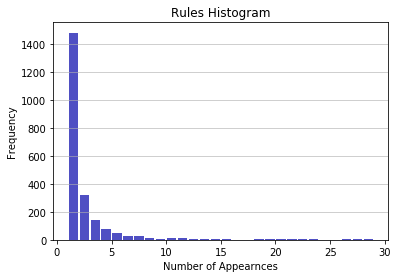

In [15]:
# plot rules frequencies
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# get frequency of each rule 
def rules_frequencies(treebank, n):
    tree_productions = []
    for i in range(n):
        for p in tree_to_productions(treebank.parsed_sents()[i]): tree_productions.append(p)
    prodcutions_counts = Counter(tree_productions)
    freq = []
    for p in prodcutions_counts:
        freq.append(prodcutions_counts[p])
    return freq

# plot histogram 
freq = rules_frequencies(treebank, 200)
hist = plt.hist(x=freq, bins=range(1,30), color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Appearnces')
plt.ylabel('Frequency')
plt.title('Rules Histogram')

The above histogram presents the distribution of productions according to their frequency. The vast majority of rules appears only once (more than 1500 rules), and only ~400 hundred rules appear twice. The decay is very fast, and there are no rules that appear more than 30 times in the first 200 trees of the treebank.

In [16]:
pcfg_400  = pcfg_learn(treebank, 400)
p, size_p = pcfg_to_mleprobdist(pcfg.productions())
q, size_q = pcfg_to_mleprobdist(pcfg_400.productions())
all_productions = set(pcfg.productions() + pcfg_400.productions())
X = [Production(prod.lhs(), prod.rhs()) for prod in all_productions]
kl = kl_divergence(p, size_p, q, size_q, X)
print('KL-divergence between 200-trees and 400-trees: ' + str(kl))

KL-divergence between 200-trees and 400-trees: 0.8011812166698754


### 2.3: Induce a PCFG in Chomsky Normal Form

We now want to learn a PCFG in Chomsky Normal Form from the treebank, with simplified tags, and with filtered NONE elements.

In [2]:
treebank = LazyCorpusLoader('treebank/combined', BracketParseCorpusReader, r'wsj_.*\.mrg')

In [3]:
# 'NONE' filltering
def none_filtering(tree):
    for ind, leaf in reversed(list(enumerate(tree.leaves()))):
        postn = tree.leaf_treeposition(ind)
        parentpos = postn[:-1]
        parentpos_label = tree[parentpos].label()
        if 'NONE' in parentpos_label:
            while parentpos and len(tree[parentpos]) == 1:
                postn = parentpos
                parentpos = postn[:-1]
            del tree[postn]

def simplify_functional_tag(tag):
    if '-' in tag:
        tag = tag.split('-')[0]
    return tag

In [4]:
# we need to transform the tree to remove NONE tags and simplify tags.
def get_tag(tree):
    if isinstance(tree, Tree):
        return Nonterminal(simplify_functional_tag(tree.label()))
    else:
        return tree

def tree_to_production(tree):
    return Production(get_tag(tree), [get_tag(child) for child in tree])

def tree_to_productions(tree):
    none_filtering(tree)
    yield tree_to_production(tree)
    for child in tree:
        if isinstance(child, Tree):
            for prod in tree_to_productions(child):
                yield prod

In [13]:
# This method adds the pos tags and words in the corpus to the productoions,
# which enables the parser to handle unseen words in training time.
def add_pos_tags_to_productions(treebank,productions):
    for word,tag in treebank.tagged_words():
        t = Tree.fromstring("("+tag+" "+word+")")
        for production in t.productions():
            productions.append(production)
    return productions

In [22]:
def pcfg_cnf_learn(trees, n):
    cnf_productions = []
    for i in range(n):
        tree = trees[i]
        cnf_tree = deepcopy(tree)
        cnf_tree.chomsky_normal_form(factor='right', horzMarkov=1, vertMarkov=1, childChar='|', parentChar='^')
        for p in tree_to_productions(cnf_tree): cnf_productions.append(p)
        #for p in tree_to_productions(tree): orig_productions.append(p)
    #cnf_productions = add_pos_tags_to_productions(treebank,cnf_productions)
    start = Nonterminal('S')
    return nltk.grammar.induce_pcfg(start, cnf_productions)

In [28]:
def pcfg_learn(trees, n):
    productions = []
    for i in range(n):
        tree = trees[i]
        for p in tree_to_productions(tree): productions.append(p)
    start = Nonterminal('S')
    return nltk.grammar.induce_pcfg(start, productions)

In [23]:
parsed_sents = treebank.parsed_sents()
pcfg_cnf = pcfg_cnf_learn(parsed_sents, 200)

In [24]:
productions = pcfg_cnf.productions()
print('Number of productions: ' + str(len(productions)))

Number of productions: 3004


We see that we now have 3004 productions, for a pcfg generaged from 200 sentences. This is in respect to the 2271 we previously had, and is expected since we are now working with a CNF version of the trees, which breaks down the productions into binary productions and add more options.

Now let's compare the amount of inner nodes (which based on the previous remark, should be more than what we had before).<br>
Previously we had 57 interior nodes. Now we have:

In [25]:
# compute number of interial nodes
non_terminals = []
for p in productions:
    lhs = str(p.lhs()) # get production's left hand 
    lhs = lhs.split(' ')
    for symbol in lhs:
        non_terminals.append(symbol)
        
print('Number of interior nodes: ' + str(len(set(non_terminals))))

Number of interior nodes: 345


In [41]:
# plot rules frequencies

# get frequency of each rule 
def rules_frequencies(treebank, n):
    tree_productions = []
    for i in range(n):
        tree = treebank.parsed_sents()[i]
        tree.chomsky_normal_form(factor='right', horzMarkov=1, vertMarkov=1, childChar='|', parentChar='^')
        for p in tree_to_productions(tree): tree_productions.append(p)
    prodcutions_counts = Counter(tree_productions)
    freq = []
    for p in prodcutions_counts:
        freq.append(prodcutions_counts[p])
    return freq


Text(0.5,1,'Rules Histogram')

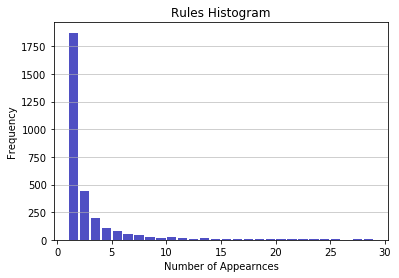

In [42]:
# plot histogram 
freq = rules_frequencies(treebank, 200)
hist = plt.hist(x=freq, bins=range(1,30), color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Appearnces')
plt.ylabel('Frequency')
plt.title('Rules Histogram')

In [36]:
len(productions)

3004

When comparing the corrent ratios with those previously calculated, we see that not much has changed, and we still get the power-law distribution, i.e. few rules have most of the occurencies. 

### 2.4: Test CFG Independence Assumptions

In [29]:
pcfg = pcfg_learn(parsed_sents, 200)

In [125]:
# Get frequency by rule 
def frequency_per_rule(treebank, n, rule, father=None):
    tree_productions = []
    if father is not None:
        found_father = False
    else:
        found_father = True
    for i in range(n):
        tree = treebank.parsed_sents()[i]
        products = tree_to_productions(tree)
        for p in products:
            if p.lhs() == rule and found_father:
                tree_productions.append(p.rhs())
                if father is not None:
                    found_father = False
            if father is not None:
                if p.lhs() == father:
                    found_father = True
    prodcutions_counts = Counter(tree_productions)
    freq = []
    for p in prodcutions_counts:
        freq.append(prodcutions_counts[p])
    return freq, prodcutions_counts


In [107]:
def filter_dict(counts, min_val):
    relevant = { k: v for k, v in counts.items() if v >= min_val }
    print("Before filtering, the dict length was: {}".format(len(counts)))
    print("And now is: {}".format(len(relevant)))
    return relevant

In [139]:
def plot_dict(relevant):
    objects = tuple(relevant.keys())
    y_pos = np.arange(len(objects))
    performance = relevant.values()

    plt.bar(y_pos, performance, alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('occurrences')
    plt.title('NP on the lhs')

    plt.show()

In [130]:
rule = Nonterminal('NP')
rule_freq, counts = frequency_per_rule(treebank, 200, rule)

We will now show the distribution of all rules which have NP on the lhs.<br>
In order for the distribution to be more visually informative, we remove the rules which have a counts less than 45.

In [153]:
relevant = filter_dict(counts, 70)
relevant

Before filtering, the dict length was: 265
And now is: 4


{(NNP, NNP): 83, (DT, NN): 137, (NP, PP): 177, (NNP,): 70}

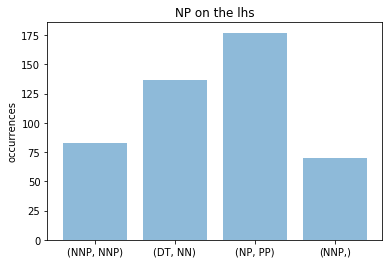

In [154]:
plot_dict(relevant)

We now plot the same distribution only for NPs that appear directly below a S node.

In [133]:
father = Nonterminal('S')
rule_freq1, counts1 = frequency_per_rule(treebank, 200, rule, father)

In [143]:
relevant1 = filter_dict(counts1, 20)
relevant1

Before filtering, the dict length was: 99
And now is: 4


{(NNP, NNP): 25, (NP, PP): 56, (PRP,): 50, (DT, NN): 29}

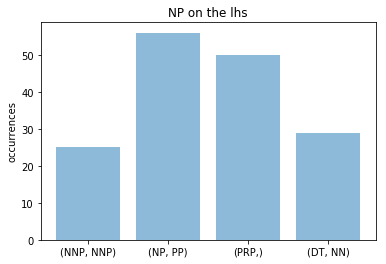

In [144]:
plot_dict(relevant1)

We now plot the same distribution only for NPs that appear directly below a VP node.

In [136]:
father = Nonterminal('VP')
rule_freq2, counts2 = frequency_per_rule(treebank, 200, rule, father)

In [145]:
relevant2 = filter_dict(counts2, 15)
relevant2

Before filtering, the dict length was: 110
And now is: 4


{(DT, NN): 32, (NP, PP): 82, (PRP,): 26, (NN,): 18}

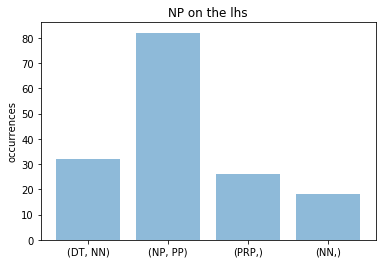

In [146]:
plot_dict(relevant2)

So we see that our distributions differ on the change of the father node. For example we see that the top 4 most probable rules for S->NP doesnt contain 'NN' whereas the top 4 most probable rules for VP->NP doesnt contain 'NNP,NNP'<br>
We now compare the distributions above, using KL-divergence, which we will compute using 400 trees.

In [209]:
# computes KL-divergence
# p, q : MLEProbDist object
# size_p, size_q : int
# X : iterable with all possible events
def kl_divergence(p, size_p, q, size_q, X):
    
    # initialize smoothing parameters
    eps = 0.000001
    pc = eps * (len(X)-size_p) / size_p
    qc = eps * (len(X)-size_q) / size_q
    
    kl = 0.0
    for x in X:
        pi = p.prob(x) - pc
        if pi <= 0:
            pi = eps
        qi = q.prob(x) - pc
        if qi <= 0:
            qi = eps
        kl += pi * math.log(pi/qi, 2)
    
    return kl

In [210]:
# Get frequency by rule 
def get_productions_by_rule(treebank, n, rule, father=None):
    tree_productions = []
    if father is not None:
        found_father = False
    else:
        found_father = True
    for i in range(n):
        tree = treebank.parsed_sents()[i]
        products = tree_to_productions(tree)
        for p in products:
            if p.lhs() == rule and found_father:
                tree_productions.append(p)
                if father is not None:
                    found_father = False
            if father is not None:
                if p.lhs() == father:
                    found_father = True
    prodcutions_counts = Counter(tree_productions)
    return tree_productions, prodcutions_counts


In [215]:
prod3, counts3 = get_productions_by_rule(treebank, 200, rule, Nonterminal('S'))
prod4, counts4 = get_productions_by_rule(treebank, 200, rule, Nonterminal('VP'))

In [216]:
p = MLEProbDist(FreqDist(counts3))
size_p = len(counts3)
q = MLEProbDist(FreqDist(counts4))
size_q = len(counts4)


# compute KL-Divergence with smoothing
X = [Production(p.lhs(), p.rhs()) for p in pcfg.productions(rule)]     
kl = kl_divergence(p, size_p, q, size_q, X)
print('KL divergence for ' + str(rule) + ' symbol: ' + str(kl))

KL divergence for NP symbol: 1.3897824004504609


The KL divergence tells us that for the different NP types there is a clear difference in the distributions, and so we can conclude that the data in the treebank does not confirm the CFG hypothesis for each configuration.

## 3: Building and Evaluating a Simple PCFG Parser

### 3.1: Build a Parser

Split the NLTK treebank corpus into 80% training (about 3,200 trees) and 20% (about 800 trees) testing sets. 

In [338]:
train_trees, test_trees = train_test_split(parsed_sents, test_size=0.20, random_state=42)

In [339]:
all_sents = treebank.sents()
train_sents, test_sents = train_test_split(all_sents, test_size=0.20, random_state=42)

In [374]:
pcfg_cnf_long = pcfg_cnf_learn(train_trees, len(train_trees))

In [375]:
productions = pcfg_cnf_long.productions()
print('Number of productions: ' + str(len(productions)))

Number of productions: 17798


We now move on to creating a Viterbi parser, and check how it does when parsing the first sentence in the test data.

In [281]:
parser = ViterbiParser(pcfg_cnf_long, trace=0)

In [282]:
parsed, = parser.parse(test_sents[0])

ValueError: Grammar does not cover some of the input words: "'appropriators', '*U*', 'Overseas', '*-3', '*U*'".

Oh no! Our grammer doesn't cover some words in the test data.<br>
So let's add the missing words and try not to blow up our existing grammer too much in the process.

We will add all the missing test words to the trained productions.<br><br>
First create a dictionary of all the words in the test set.

In [289]:
test_words_dict = {}
for sent in test_sents:
    for word in sent:
        test_words_dict[word] = 0

In [290]:
# go over all the words in the trained productions.
# remove all the terminal rules which produce words not in the test sents.
# add new rules for words in the test sents which were not seen.
train_words_dict = {}
for p in productions:
    rhs = p.rhs()[0]
    if type(rhs) is str:
        if rhs not in test_words_dict:
            productions.remove(p)
        else:
            train_words_dict[rhs] = 0

In [291]:
print("The number of relevant training words is {}".format(len(train_words_dict)))
print('Number of productions: ' + str(len(productions)))

The number of relevant training words is 2723
Number of productions: 12785


In [292]:
# This method adds the pos tags and words in the corpus to the productoions,
# which enables the parser to handle unseen words in training time.
def add_pos_tags_to_productions(treebank,productions,requested_words, existing_words):
    for word,tag in treebank.tagged_words():
        if word in requested_words and word not in existing_words:
            t = Tree.fromstring("("+tag+" "+word+")")
            for production in t.productions():
                productions.append(production)
    return productions

In [295]:
# add all the pos tags and words in the corpus so that the parser can handle unseen words
productions = add_pos_tags_to_productions(treebank,productions,test_words_dict,train_words_dict)

In [296]:
print('Number of productions: ' + str(len(pcfg_cnf_long.productions())))

Number of productions: 27374


In [297]:
# Now that we have all the productions we need, rebuild the grammer.
pcfg_cnf_long = nltk.grammar.induce_pcfg(Nonterminal('S'), productions)

In [298]:
parser = ViterbiParser(pcfg_cnf_long, trace=0)

Now are vocabulary contains all the needed words in the test data.<br>
Probalem is, it takes us a very (very...) long time to parse long sentences. (For the sentene which failed above, I stopped after it ran over a minute). Since there are 800 test sentences this is going to be an issue.<br>
For this we will sort the test sentences by length, and only work with sentences up to length 9 (which is a descent size senteces that normal people can cope with).

In [350]:
test_sents_lens = [len(x) for x in test_sents]
_,test_sents, test_trees = (list(x) for x in zip(*sorted(zip(test_sents_lens,test_sents, test_trees))))
print(len(test_sents[1]))
print(len(test_sents[-1]))
test_sents[1]

2
110


['Detroit', '--']

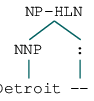

In [351]:
test_trees[1]

In [480]:
upper_bound = 9
relevant_sents = []
relevant_trees = []
for ind in range(len(test_sents)):
    sent = test_sents[ind]
    if len(sent) <= upper_bound:
        relevant_sents.append(sent)
        relevant_trees.append(test_trees[ind])
        continue
    break

In [481]:
len(relevant_sents)

51

So are final test will have 51 sentences.<br>
Let's remove the unnecessary words from our grammer.

In [377]:
test_words_dict = {}
for sent in relevant_sents:
    for word in sent:
        test_words_dict[word] = 0

In [378]:
# go over all the words in the trained productions.
# remove all the terminal rules which produce words not in the test sents.
# add new rules for words in the test sents which were not seen.
train_words_dict = {}
for p in productions:
    rhs = p.rhs()[0]
    if type(rhs) is str:
        if rhs not in test_words_dict:
            productions.remove(p)
        else:
            train_words_dict[rhs] = 0

In [379]:
print('Number of productions: ' + str(len(pcfg_cnf_long.productions())))

Number of productions: 10910


In [380]:
# add all the test pos tags and words in the from the whole corpus so that the parser can handle unseen words
productions = add_pos_tags_to_productions(treebank,productions,test_words_dict,train_words_dict)

In [381]:
print('Number of productions: ' + str(len(pcfg_cnf_long.productions())))

Number of productions: 15189


We cut down in another 10K productions, which will take down the processing time needed to parse the sentences.

In [383]:
# Now that we have all the productions we need, rebuild the grammer.
pcfg_cnf_long = nltk.grammar.induce_pcfg(Nonterminal('S'), productions)

In [384]:
parser = ViterbiParser(pcfg_cnf_long, trace=0)

In [391]:
parsed, = parser.parse(relevant_sents[-2])

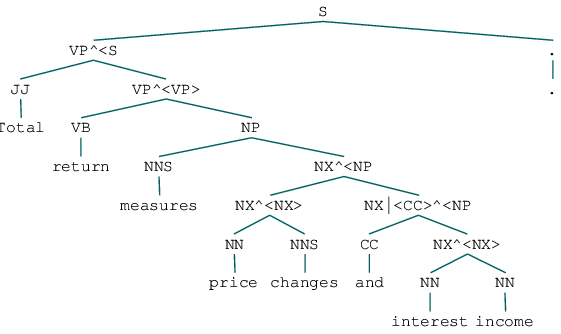

In [389]:
parsed

Now the longest sentence takes only 10 seconds to parse!

### 3.2: Evaluate the Parser

create all the test trees

In [486]:
learned_trees = []
copy_relevant_trees = deepcopy(relevant_trees)
ind = -1
for sent in relevant_sents:
    ind += 1
    print(ind)
    try:
        parsed, = parser.parse(sent)
        learned_trees.append(parsed)
    except ValueError:
        del copy_relevant_trees[ind]

In [483]:
print(len(learned_trees))

44


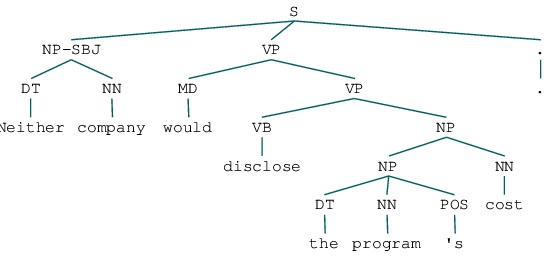

In [495]:
copy_relevant_trees[39]
#needed to delete the 37 value and the 44 value which caused clashes

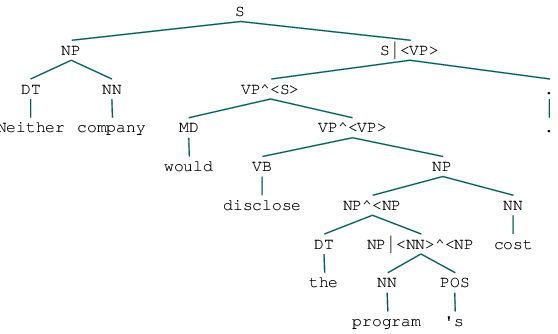

In [494]:
learned_trees[39]

Till the 39th tree we have the same sentences, so we will use till 39

Turn the tests trees into the cnf form in order to compare with what we've learned.

In [712]:
cnf_test = []
for ind in range(40):
    if ind%5 == 0:
        print(ind)
    t = copy_relevant_trees[ind]
    cnf_tree = deepcopy(t)
    cnf_tree.chomsky_normal_form(factor='right', horzMarkov=1, vertMarkov=1, childChar='|', parentChar='^')
    cnf_test.append(cnf_tree)

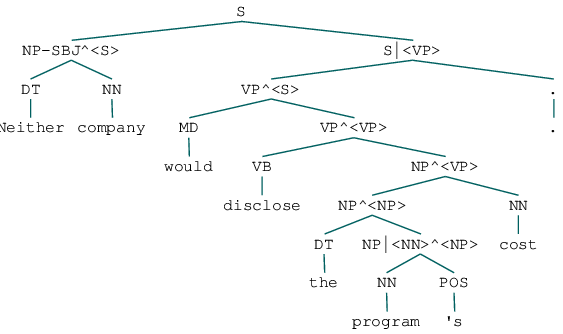

In [502]:
cnf_test[39]

So we see we got learned the correct tree (more or less).<br>
Now let's evaluate what we learned.<br>
For each tree in test, we'll great a list of constituents for the learned trees and the real trees in cnf form. Then we'll compare the two lists.

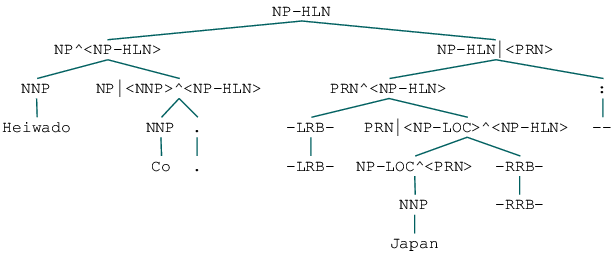

In [639]:
cnf_test[20]

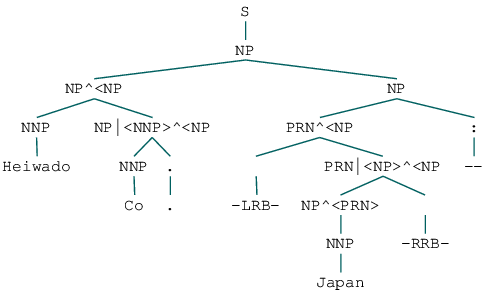

In [583]:
learned_trees[20]

But first we might need to do the cleaning up.<br>
As can be seen in the trees above there are a few things we would like to fix in the learned trees, which dont effent the correctness of the tree, but will effect the similarity between trees.<br>
1. we see that -LRB- doesnt have a parent node. We'll change the parent to be itself.
2. we see that there is a missing '>' in "NP^<NP". So we'll remove also from the true trees.
3. We will remove from the true trees the elements after a dash '-'.
4. We see that there is a 'S' in the beginning of the learned trees, even if there isn't really a need (since it has a single child). In that case we'll remove the 'S'.

In [911]:
def clean_root(tree):
    t = str(tree.label())
    if t != "":
        if t[0] != "-":
            t = t.split('-')[0]
        if t[-1] == ">":
            t = t[:-1]
        t = t.split('^')[0]
        t = t.split('|')[0]
    else:
        t = tree[0]
    return t
    
def remove_useless_S(tree):
    root = clean_tag(tree.label())
    if root == 'S': #if S only has one son
        if len(tree) < 2:
            return tree.pop() #return the subtree without the S
    return tree

In [913]:
def get_all_constituents(tree):
    constituents = []
    copy = deepcopy(tree)
    copy = remove_useless_S(copy)
    constituents.append([clean_root(copy), copy.leaves()])
    if (copy.height() == 2): #got to father of terminal
        return constituents
#     try:
    constituents += get_all_constituents(copy[0]) # get lhs constituents
    if len(copy) > 1:
        constituents += get_all_constituents(copy[1]) # get rhs constituents
#     except IndexError:
#         print (copy)
    return constituents

Here's an exapmple where the constituents are the same:

In [914]:
cons1 = get_all_constituents(learned_trees[10])
cons2 = get_all_constituents(cnf_test[10])

In [915]:
print(cons1 == cons2)

True


And here's an exapmple where they're not the same:

In [916]:
cons1 = get_all_constituents(learned_trees[20])
cons2 = get_all_constituents(cnf_test[20])

In [917]:
print(cons1 == cons2)

True


In [918]:
cons1

[['NP', ['Heiwado', 'Co', '.', '-LRB-', 'Japan', '-RRB-', '--']],
 ['NP', ['Heiwado', 'Co', '.']],
 ['NNP', ['Heiwado']],
 ['NP', ['Co', '.']],
 ['NNP', ['Co']],
 ['.', ['.']],
 ['NP', ['-LRB-', 'Japan', '-RRB-', '--']],
 ['PRN', ['-LRB-', 'Japan', '-RRB-']],
 ['-LRB-', ['-LRB-']],
 ['PRN', ['Japan', '-RRB-']],
 ['NP', ['Japan']],
 ['NNP', ['Japan']],
 ['-RRB-', ['-RRB-']],
 [':', ['--']]]

In [919]:
cons2

[['NP', ['Heiwado', 'Co', '.', '-LRB-', 'Japan', '-RRB-', '--']],
 ['NP', ['Heiwado', 'Co', '.']],
 ['NNP', ['Heiwado']],
 ['NP', ['Co', '.']],
 ['NNP', ['Co']],
 ['.', ['.']],
 ['NP', ['-LRB-', 'Japan', '-RRB-', '--']],
 ['PRN', ['-LRB-', 'Japan', '-RRB-']],
 ['-LRB-', ['-LRB-']],
 ['PRN', ['Japan', '-RRB-']],
 ['NP', ['Japan']],
 ['NNP', ['Japan']],
 ['-RRB-', ['-RRB-']],
 [':', ['--']]]

In [920]:
learned_cons = []
real_cons = []
for ind in range(len(cnf_test)):
    learned_cons.append(get_all_constituents(learned_trees[ind]))
    real_cons.append(get_all_constituents(cnf_test[ind]))

We now can finally calculate the precision, recall and f-scores.

In [961]:
def find_matching_constituents(t1,t2,labeled):
    num_of_matches = 0
    for ind1 in range(len(t1)):
        constituent = t1[ind1]
        for ind2 in range(len(t2)):
            c2 = t2[ind2]
            if labeled==False and constituent[1] == c2[1]:
                    num_of_matches += 1
                    break
            elif constituent[0] == c2[0] and constituent[1] == c2[1]:
                    num_of_matches += 1
                    break
    return num_of_matches 

In [965]:

num_real_cons = 0
num_learned_cons = 0
num_of_correct_cons = 0
num_of_correct_labeled_cons = 0

for tree_ind in range (len(cnf_test)):
    c1 = real_cons[tree_ind]
    num_real_cons += len(c1)
    c2 = learned_cons[tree_ind]
    num_learned_cons += len(c2)
    crs = find_matching_constituents(c1,c2,labeled=False)
    num_of_correct_cons += crs
    num_of_correct_labeled_cons += find_matching_constituents(c1,c2,labeled=True)

In [966]:
def compute_f_score(p, r):
    return 2*p*r/(p+r)

precision = num_of_correct_cons/float(num_learned_cons)
recall = num_of_correct_cons/float(num_real_cons)
f_score = compute_f_score(precision, recall)
precision_labeled = num_of_correct_labeled_cons/float(num_learned_cons)
recall_labeled = num_of_correct_labeled_cons/float(num_real_cons)
f_score_labeled = compute_f_score(precision_labeled, recall_labeled)

In [967]:
print(num_of_correct_cons)
print(num_of_correct_labeled_cons)

317
255


In [968]:
print("Un-labelled:")
print("The precision is {}".format(precision))
print("The recall is {}".format(recall))
print("The f-score is {}".format(f_score))
print()
print("Labelled:")
print("The precision is {}".format(precision_labeled))
print("The recall is {}".format(recall_labeled))
print("The f-score is {}".format(f_score_labeled))

Un-labelled:
The precision is 0.6617954070981211
The recall is 0.6716101694915254
The f-score is 0.6666666666666666

Labelled:
The precision is 0.5323590814196242
The recall is 0.5402542372881356
The f-score is 0.5362776025236593


### 3.3: Accuracy per Distance

Here we show a plot of the accuracy of constituents per constituent length.

In [927]:
def find_matching_constituents_per_length(t1,t2,labeled):
    lengths = [0] * len(t1[0][1])
    accs_per_legth = [0] * len(t1[0][1]) # number of words that the root covers
    for ind1 in range(len(t1)):
        constituent = t1[ind1]
        c_len = len(constituent[1])
        lengths[c_len-1] += 1
        for ind2 in range(len(t2)):
            c2 = t2[ind2]
            if labeled==False and constituent[1] == c2[1]:
                    accs_per_legth[c_len-1] += 1
                    break
            elif constituent[0] == c2[0] and constituent[1] == c2[1]:
                    accs_per_legth[c_len-1] += 1
                    break
    return accs_per_legth, lengths 

In [928]:
def add_to_accs(accd_d, accs_l):
    for ind in range(len(accs_l)):
        length = ind+1
        val = accs_l[ind]
        if length not in accd_d:
            accd_d[length] = val
        else:
            accd_d[length] += val

In [929]:
all_lengths = {}
accs_per_length = {}
accs_per_length_labeled = {}

for tree_ind in range (len(cnf_test)):
    c1 = real_cons[tree_ind]
    c2 = learned_cons[tree_ind]
    correct_lengths, lengths = find_matching_constituents_per_length(c1,c2,labeled=False)
    add_to_accs(accs_per_length, correct_lengths)
    correct_lengths_labeled, lengths = find_matching_constituents_per_length(c1,c2,labeled=True)
    add_to_accs(accs_per_length_labeled, correct_lengths_labeled)
    add_to_accs(all_lengths, lengths)
    
final_acc = {}
final_acc_labeled = {}
for key, value in accs_per_length.items():
    final_acc[key] = value/float(all_lengths[key])
    final_acc_labeled[key] = accs_per_length_labeled[key]/float(all_lengths[key])

In [930]:
final_acc

{1: 0.7582417582417582,
 2: 0.625,
 3: 0.4186046511627907,
 4: 0.5625,
 5: 0.4444444444444444,
 6: 0.5625,
 7: 0.5714285714285714,
 8: 0.8571428571428571,
 9: 0.6}

In [931]:
final_acc_labeled

{1: 0.6263736263736264,
 2: 0.5,
 3: 0.2558139534883721,
 4: 0.3125,
 5: 0.3888888888888889,
 6: 0.5625,
 7: 0.5,
 8: 0.7142857142857143,
 9: 0.6}

In [945]:
def plot_dict(relevant):
    objects = tuple(relevant.keys())
    y_pos = np.arange(len(objects))
    performance = relevant.values()

    plt.bar(y_pos, performance, alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('accuracy')

    plt.show()

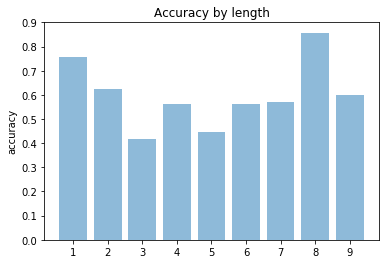

In [933]:
plot_dict(final_acc)

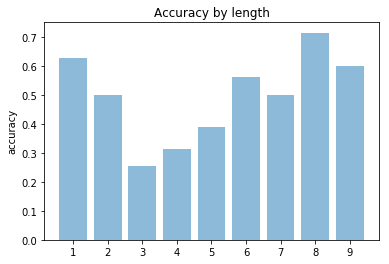

In [934]:
plot_dict(final_acc_labeled)

### 3.4: Accuracy per Label

Here we will report the accuracy of constituents per label type

In [936]:
def find_matching_constituents_per_label(t1,t2):
    num_of_labels = {}
    accs_per_label = {}
    for ind1 in range(len(t1)):
        constituent = t1[ind1]
        label = constituent[0]
        if label not in accs_per_label:
            accs_per_label[label] = 0
            num_of_labels[label] = 1
        else:
            num_of_labels[label] += 1
        for ind2 in range(len(t2)):
            c2 = t2[ind2]
            if constituent[0] == c2[0] and constituent[1] == c2[1]:
                    accs_per_label[label] += 1
                    break
    return accs_per_label, num_of_labels 

In [937]:
def add_dict_to_accs(accs, accs_n):
    for key, value in accs_n.items():
        if key not in accs:
            accs[key] = value
        else:
            accs[key] += value

In [938]:
accs_per_label = {}
labels_amount = {}

for tree_ind in range (len(cnf_test)):
    c1 = real_cons[tree_ind]
    c2 = learned_cons[tree_ind]
    correct_labels, lengths = find_matching_constituents_per_label(c1,c2)
    add_dict_to_accs(accs_per_label, correct_labels)
    add_dict_to_accs(labels_amount, lengths)

In [947]:
final_acc = {}
for key, value in accs_per_label.items():
    final_acc[key] = value/float(labels_amount[key])

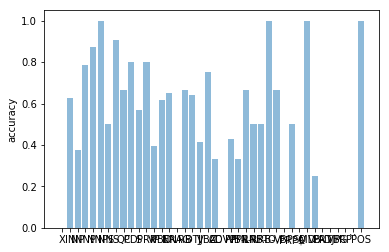

In [948]:
plot_dict(final_acc)

Since it is very hard to see what are the labels, we'll only show the plot for the following labels: S, NP, VP, PP.

In [949]:
chosen = ["S", "NP", "VP", "PP"]
final_acc = {}
for key, value in accs_per_label.items():
    if key in chosen:
        final_acc[key] = value/float(labels_amount[key])

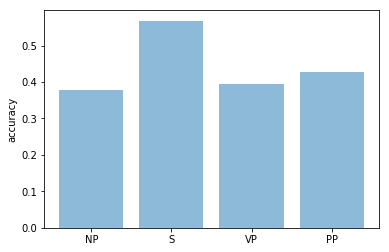

In [950]:
plot_dict(final_acc)